<a href="https://colab.research.google.com/github/evacragnolino/Data-Science-Foundations/blob/main/eva_cragu4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Who will make it out of the South Central Region for NCAA XC?

Based on times and placements of runners at conference meet this season?

Context:

This Friday November 14th D1 college cross country teams will line up across the nation to qualify for the national meet. Closest to us teams in the south central region will race in Fayetville, Arkansas. Historically the south central region is weak with only the two automatic spots being given and no at large spots given to the south central region. This region has also been dominated by two schools the University of Texas and the University of Arkansas. This is an intresting year since both UT and Arkansas have not been good and it will likely be two different teams going to nationals. In this project I took 6 of the best teams in the region and looked a their conference meet performances to predict regional performances.

I predict based on following college cross country this year that Tulane and LSU will make the national meet.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm

In [ ]:
url_conference_xc = 'https://raw.githubusercontent.com/evacragnolino/Data-Science-Foundations/refs/heads/main/unit%204%20data%20-%20Sheet1%20(1).csv'
xc_data = pd.read_csv(url_conference_xc)


In [ ]:
xc_data

,place,name,eligibility,school,pace,time,scoring,conference
0,11,Sydney Thorvaldson,SR-4,Arkansas,5:28.6,20:25.1,11,SEC
1,13,Edna Chepkemoi,SO-2,LSU,5:29.2,20:27.6,13,SEC
2,14,Elizabeth Pickett,SR-4,Texas,5:29.5,20:28.7,14,SEC
3,15,Yuya Sawada,SO-2,LSU,5:29.6,20:29.0,15,SEC
4,16,Joyce Kemboi,SO-2,Texas A&M,5:29.7,20:29.2,16,SEC
5,17,Debora Cherono,FR-1,Texas A&M,5:30.3,20:31.4,17,SEC
6,24,Olivia Pielemeier,SO-2,Arkansas,5:33.1,20:42.0,24,SEC
7,27,Abigael Chemnagei,FR-1,LSU,5:35.1,20:49.3,27,SEC
8,28,Megan Roberts,SO-2,Texas A&M,5:35.3,20:50.2,28,SEC
9,50,Micaela Villarreal,FR-1,LSU,5:41.3,21:12.7,49,SEC


Violin plots

This one is based on place by school and will illustrate spread and how balanced the team is.

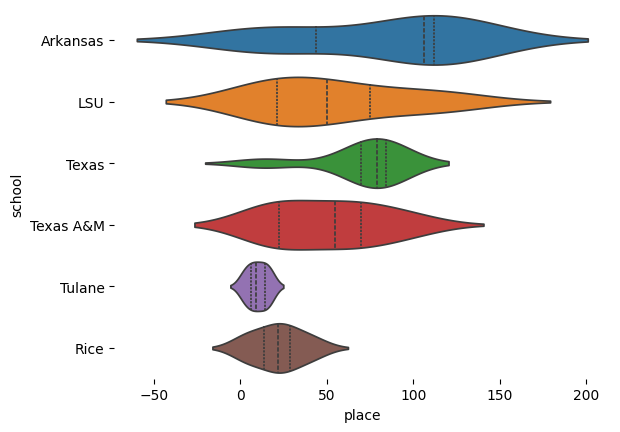

In [ ]:
sns.violinplot(xc_data, x='place', y='school', inner='quart',hue='school')
sns.despine(top=True, right=True, bottom=True, left=True)

It looks like Texas A&M Tulane and Rice have pretty balanced teams!

This shows on  how different years perform

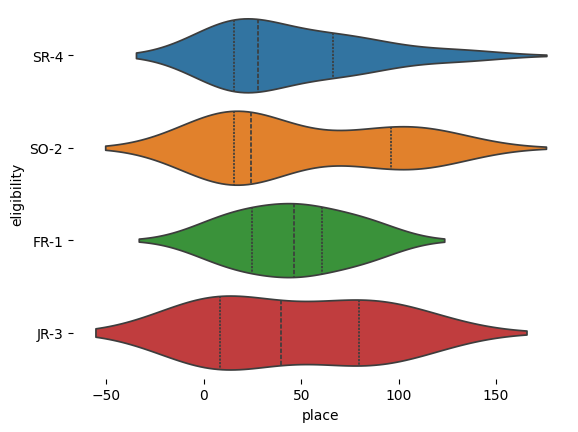

In [ ]:
sns.violinplot(xc_data, x='place', y='eligibility', inner='quart',hue='eligibility')
sns.despine(top=True, right=True, bottom=True, left=True)

This violin plot shows difference in conference strength

(The SEC is a much stronger conference than the American)

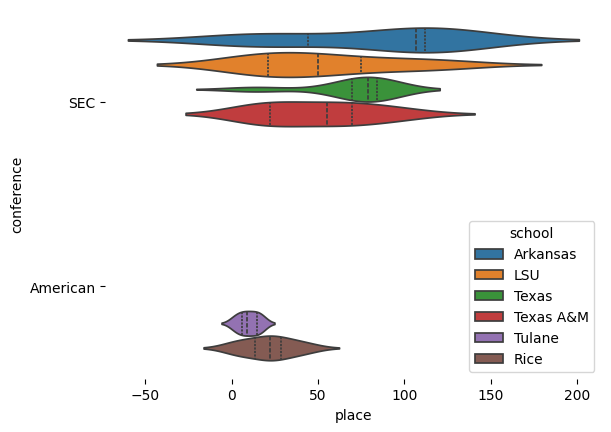

In [ ]:
sns.violinplot(xc_data, x='place', y='conference', inner='quart',hue='school')
sns.despine(top=True, right=True, bottom=True, left=True)

Below I'm encoding and indexing all the word data:

In [ ]:
name_encode = pd.Categorical(xc_data['name'])
name_encode

['Sydney Thorvaldson', 'Edna Chepkemoi', 'Elizabeth Pickett', 'Yuya Sawada', 'Joyce Kemboi', ..., 'Miranda Schriver', 'Heidi Nielson', 'Daphne Mayer', 'Molly Humes', 'Niamh Collins']
Length: 41
Categories (41, object): ['Abigael Chemnagei', 'Ahry Comer', 'Aishling Callanan', 'Alex Gobran', ...,
                          'Staucie Lees', 'Sydney Thorvaldson', 'Taylor Tarpley', 'Yuya Sawada']

In [ ]:
uni_encode = pd.Categorical(xc_data['school'])
uni_encode

['Arkansas', 'LSU', 'Texas', 'LSU', 'Texas A&M', ..., 'Rice', 'Rice', 'Rice', 'Rice', 'Rice']
Length: 41
Categories (6, object): ['Arkansas', 'LSU', 'Rice', 'Texas', 'Texas A&M', 'Tulane']

In [ ]:
eligibility_encode = pd.Categorical(xc_data['eligibility'])
eligibility_encode

['SR-4', 'SO-2', 'SR-4', 'SO-2', 'SO-2', ..., 'SR-4', 'SR-4', 'SO-2', 'SR-4', 'FR-1']
Length: 41
Categories (4, object): ['FR-1', 'JR-3', 'SO-2', 'SR-4']

In [ ]:
conf_encode = pd.Categorical(xc_data['conference'])
conf_encode

['SEC', 'SEC', 'SEC', 'SEC', 'SEC', ..., 'American', 'American', 'American', 'American', 'American']
Length: 41
Categories (2, object): ['American', 'SEC']

In [ ]:
name_idx = name_encode.codes
name_idx

array([38, 14, 16, 40, 21, 12, 31,  0, 24, 26, 35, 17, 15, 22, 10,  7, 29,
        2,  6, 25,  1, 37, 34, 36, 23, 39,  9,  8, 32, 13,  3, 18, 33, 20,
        4,  5, 27, 19, 11, 28, 30], dtype=int8)

In [ ]:
uni_idx = uni_encode.codes
uni_idx

array([0, 1, 3, 1, 4, 4, 0, 1, 4, 1, 4, 1, 4, 3, 3, 4, 3, 3, 3, 3, 1, 4,
       0, 0, 0, 1, 0, 5, 2, 5, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2],
      dtype=int8)

In [ ]:
eligibility_idx = eligibility_encode.codes
eligibility_idx

array([3, 2, 3, 2, 2, 0, 2, 0, 2, 0, 0, 3, 3, 2, 1, 0, 3, 1, 3, 0, 2, 2,
       1, 2, 2, 2, 3, 2, 2, 0, 1, 1, 1, 3, 3, 2, 3, 3, 2, 3, 0],
      dtype=int8)

In [ ]:
conf_idx = conf_encode.codes
conf_idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [ ]:
name_coords = {"name": name_encode.categories}
name_coords

{'name': Index(['Abigael Chemnagei', 'Ahry Comer', 'Aishling Callanan', 'Alex Gobran',
        'Alex Sharp', 'Allison Hall', 'Anna Christie', 'Ava Cole',
        'Blezzin Kimutai', 'Bradley Weimer', 'Brighton Mooney', 'Daphne Mayer',
        'Debora Cherono', 'Dorcas Naibei', 'Edna Chepkemoi', 'Elise Smoot',
        'Elizabeth Pickett', 'Ella Chesnut', 'Haley Harper', 'Heidi Nielson',
        'Janae Dean', 'Joyce Kemboi', 'Kaylin Rendon', 'Madeleine Gear',
        'Megan Roberts', 'Mia Perez', 'Micaela Villarreal', 'Miranda Schriver',
        'Molly Humes', 'Natasja Beijen', 'Niamh Collins', 'Olivia Pielemeier',
        'Oliwia Kopec', 'Petra Dos Santos', 'Sanu Jallow', 'Sophia Bendet',
        'Sorcha Shiu', 'Staucie Lees', 'Sydney Thorvaldson', 'Taylor Tarpley',
        'Yuya Sawada'],
       dtype='object')}

In [ ]:
uni_coords = {"school": uni_encode.categories}
uni_coords

{'school': Index(['Arkansas', 'LSU', 'Rice', 'Texas', 'Texas A&M', 'Tulane'], dtype='object')}

In [ ]:
eligibility_coords = {"eligibility": eligibility_encode.categories}
eligibility_coords

{'eligibility': Index(['FR-1', 'JR-3', 'SO-2', 'SR-4'], dtype='object')}

In [ ]:
conf_coords = {"conference": conf_encode.categories}
conf_coords

{'conference': Index(['American', 'SEC'], dtype='object')}

In [ ]:
with pm.Model(coords=uni_coords) as xc_nh_model:
    #priors

    μ = pm.Normal('μ', mu=0, sigma=10,
                  dims="school")
    σ = pm.HalfNormal('σ', sigma=10,
                      dims="school")


    y = pm.Normal('y',
                  mu = μ[uni_idx],
                  sigma = σ[uni_idx],
                  observed=xc_data['place'])


    idata_xc_nh = pm.sample()

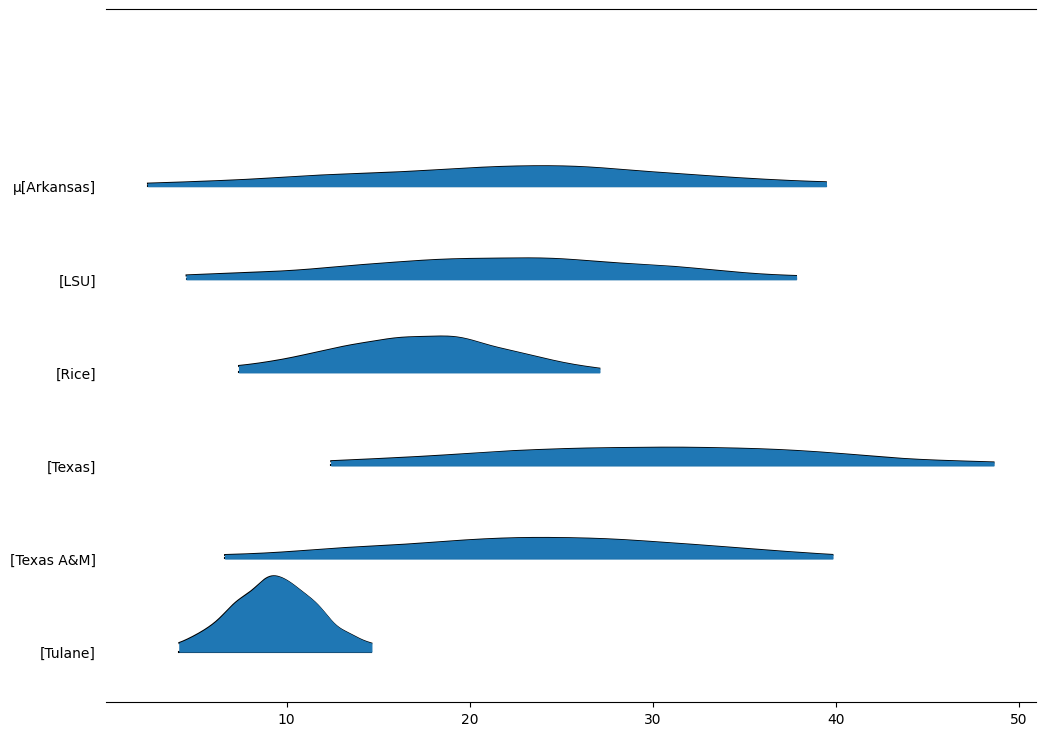

In [ ]:
axes = az.plot_forest(idata_xc_nh, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.95)

Gemini added an indent in this code block

In [ ]:
pm.sample_posterior_predictive(idata_xc_nh, model=xc_nh_model, extend_inferencedata=True)

<Axes: xlabel='y'>

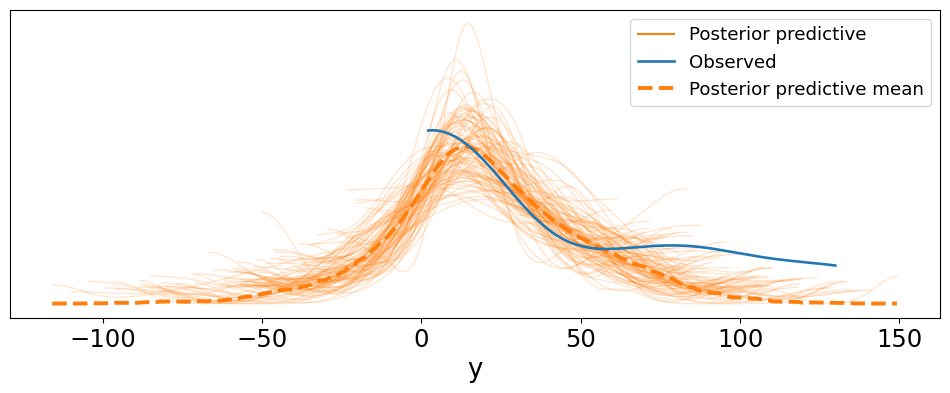

In [ ]:
az.plot_ppc(idata_xc_nh, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

next I will try a half normal

In [ ]:
with pm.Model(coords=uni_coords) as xc_nh_model:
    #priors


    σ = pm.HalfNormal('σ', sigma=10,
                      dims="school")


    y = pm.HalfNormal('y',

                  sigma = σ[uni_idx],
                  observed=xc_data['place'])


    idata_xc_nh = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_xc_nh, model=xc_nh_model, extend_inferencedata=True)

<Axes: xlabel='y'>

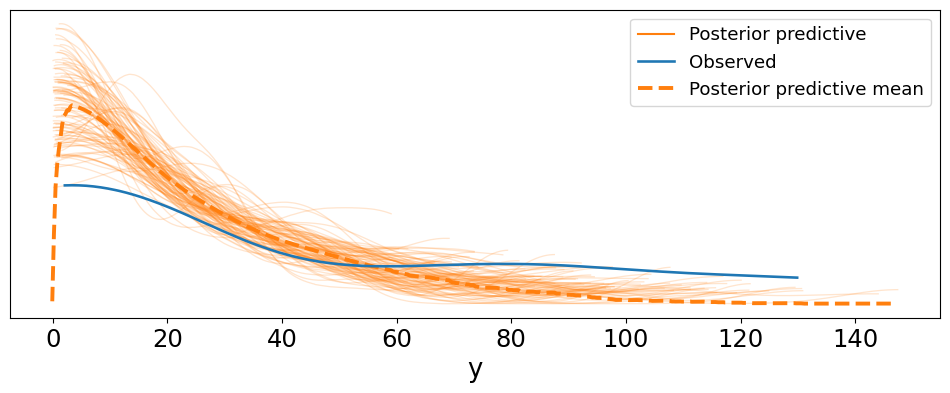

In [ ]:
az.plot_ppc(idata_xc_nh, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

hierarchal half normal model:

In [ ]:
with pm.Model(coords=uni_coords) as xc_h_model:
    #priors
    sigma= pm.HalfNormal('sigma', sigma=10)


    σ = pm.HalfNormal('σ', sigma=sigma,
                      dims="school")


    y = pm.HalfNormal('y',

                  sigma = σ[uni_idx],
                  observed=xc_data['place'])


    idata_xc_h = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_xc_h, model=xc_h_model, extend_inferencedata=True)

<Axes: xlabel='y'>

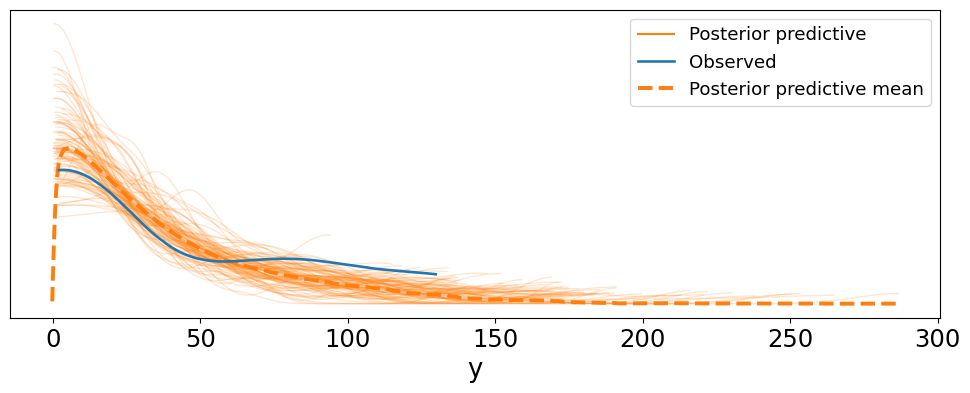

In [ ]:
az.plot_ppc(idata_xc_h, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This looks much better than my first two models. Because of this I will use the hierarchal model to predict the top two schools in womens xc in the South Central Region.

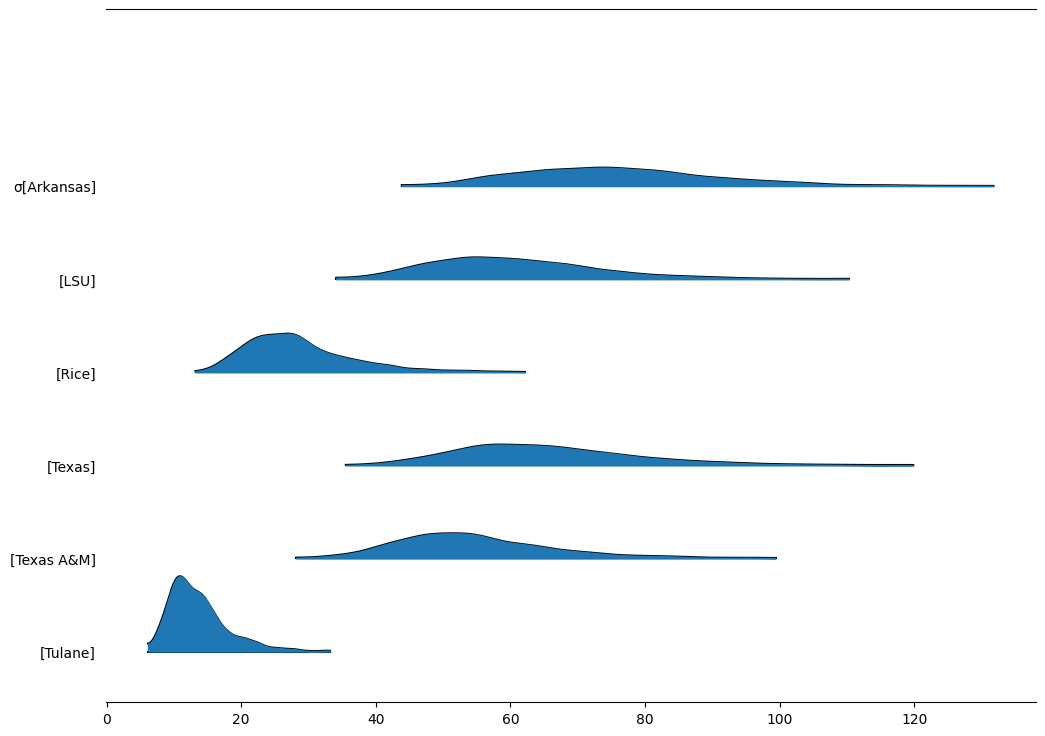

In [ ]:
axes = az.plot_forest(idata_xc_h, kind="ridgeplot",
                      var_names='σ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

This predicts that Rice and Tulane as the best teams, but they are also in a much weaker conference. While the other schools compete in one of the strongest cross country conference, the SEC. The best schools in the SEC according to this model are A&M and LSU. This model looks like it gives A&M the edge over LSU, predictiong Tulane and A&M to get the automatic national qualifying spots and usually the only spots out of the south central region.